In [6]:
#python notebook for Make Your Own Neural Network 
#code for a 3-layer neural network, and code for learning the MNIST dataset 
#(c) Tariq Rashid, 2016 
#license is GPLv2 

import numpy 
#scipy.special for the sigmoid function expit() 
import scipy.special 
#library for plotting arrays 
import matplotlib.pyplot 
#ensure the plots are inside this notebook, not an external window 
%matplotlib inline

# neural network class definition
class neuralNetwork:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih the who
        # weights inside the arrays are w_i_j, where link is from node i to
#node j in the next layer
        # w11 w21
        # w12 w22 etc
        self.wih = numpy.random.normal (0.0, pow (self.inodes, -0.5),
                                       (self.hnodes, self.inodes))
        self.who = numpy.random.normal (0.0, pow (self.hnodes, -0.5), 
                                       (self.onodes, self.hnodes))
        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs) 
        # calculate the signals emerging from hidden layer 
        hidden_outputs = self.activation_function(hidden_inputs) 
        
        # calculate signals into final output layer 
        final_inputs = numpy.dot(self.who, hidden_outputs) 
        # calculate the signals emerging from final output layer 
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual) 
        output_errors = targets - final_outputs 
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes 
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers 
        self.who += self.lr * numpy.dot((output_errors * 
                                         final_outputs * (1.0 - final_outputs)), 
                                        numpy.transpose(hidden_outputs)) 
        #update the weights for the links between the input and hidden layers 
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * 
                                         (1.0 - hidden_outputs)), numpy.transpose(inputs))        
        pass
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin = 2). T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot (self.wih, inputs)
        #calculate the signals emerging from hidden layer 
        hidden_outputs = self.activation_function(hidden_inputs) 
        
        #calculate signals into final output layer 
        final_inputs = numpy.dot(self.who, hidden_outputs) 
        #calculate the signals emerging from final output layer 
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    

In [19]:
#number of input, hidden and output nodes 
input_nodes = 784 
hidden_nodes = 100 
output_nodes = 10 

#learning rate is 0.3 
learning_rate = 0.3 

#create instance of neural network 
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate) 

#load the mnist training data CSV file into a list 
training_data_file = open("/Users/hcl/Desktop/mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines() 
training_data_file.close()

#train the neural network 
#go through all records in the training data set 
for record in training_data_list: 
    #split the record by the',' commas 
    all_values = record.split(',') 
    #scale and shift the inputs 
    inputs = (numpy.asfarray(all_values[1:])/ 255.0 * 0.99) + 0.01 
    #create the target output values (all 0.01, except the desired label which is 0.99) 
    targets = numpy.zeros(output_nodes) + 0.01
    
    #all_values[0] is the target label for this record 
    targets[int(all_values[0])] = 0.99 
    n.train(inputs, targets) 
    pass

In [20]:
#test the neural network 

#scorecard for how well the network performs, initially empty 
scorecard = [] 

#go through all the records in the test data set 
for record in test_data_list: 
    #split the record by the',' commas 
    all_values = record.split(',') 
    #correct answer is first value 
    correct_label = int(all_values[0]) 
    print(correct_label, "correct label") 
    #scale and shift the inputs 
    inputs = (numpy.asfarray(all_values[1:])/ 255.0 * 0.99) + 0.01 
    #query the network 
    outputs = n.query(inputs) 
    #the index of the highest value corresponds to the label 
    label = numpy.argmax(outputs) 
    print(label, "network's answer") 
    #append correct or incorrect to list 
    if (label == correct_label): 
        #network's answer matches correct answer, add 1 to scorecard 
        scorecard.append(1) 
    else: 
        #network's answer doesn't match correct answer, add 0 to scorecard 
        scorecard.append(0)
        pass
    
    pass


7 correct label
7 network's answer
2 correct label
3 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
3 network's answer
5 correct label
1 network's answer
9 correct label
7 network's answer


In [20]:
#test the neural network 

#scorecard for how well the network performs, initially empty 
scorecard = [] 

#go through all the records in the test data set 
for record in test_data_list: 
    #split the record by the',' commas 
    all_values = record.split(',') 
    #correct answer is first value 
    correct_label = int(all_values[0]) 
    print(correct_label, "correct label") 
    #scale and shift the inputs 
    inputs = (numpy.asfarray(all_values[1:])/ 255.0 * 0.99) + 0.01 
    #query the network 
    outputs = n.query(inputs) 
    #the index of the highest value corresponds to the label 
    label = numpy.argmax(outputs) 
    print(label, "network's answer") 
    #append correct or incorrect to list 
    if (label == correct_label): 
        #network's answer matches correct answer, add 1 to scorecard 
        scorecard.append(1) 
    else: 
        #network's answer doesn't match correct answer, add 0 to scorecard 
        scorecard.append(0)
        pass
    
    pass


7 correct label
7 network's answer
2 correct label
3 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
3 network's answer
5 correct label
1 network's answer
9 correct label
7 network's answer


In [22]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [23]:
#calculate the performance score, the fraction of correct answers 
scorecard_array = numpy.asarray(scorecard) 
print ("performance =", scorecard_array.sum()/ scorecard_array.size)

performance = 0.6


In [1]:
#load the mnist test data CSV file into a list 
test_data_file = open("/Users/hcl/Desktop/mnist_dataset/mnist_test_10.csv", 'r') 
test_data_list = test_data_file.readlines() 
test_data_file.close()

In [3]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


In [19]:
#number of input, hidden and output nodes
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

#learning rate is 0.3
learning_rate = 0.3

#create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [20]:
n.query([1.0, 0.5, -1.5])

array([[ 0.48597596],
       [ 0.35944886],
       [ 0.37954657]])

In [1]:
data_file = open("/Users/hcl/Desktop/mnist_dataset/mnist_train_100.csv", 'r') 
data_list = data_file.readlines() 
data_file.close()

In [2]:
len(data_list)

100

In [3]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [4]:
import matplotlib.pyplot
%matplotlib inline

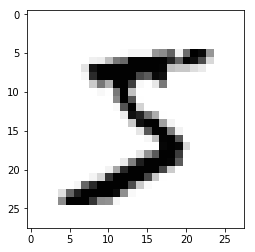

In [8]:
all_values = data_list[0].split(',') 
image_array = numpy.asfarray(all_values[1:]).reshape((28,28)) 
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [30]:
scaled_input = (numpy.asfarray(all_values[1:])/ 255.0 * 0.99) + 0.01 
print(scaled_input)


[ 0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.

In [9]:
#output nodes is 10 (example)
onodes = 10
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

In [11]:
print(targets)

[ 0.01  0.01  0.01  0.01  0.01  0.99  0.01  0.01  0.01  0.01]
